In [1]:
from nldg.utils import *
from nldg.rf import MaggingRF_PB
from adaXT.random_forest import RandomForest

## Setting 1

In [2]:
dtr = gen_data_v2(n=1000, random_state=42)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 15
random_state = 0

dval = gen_data_v2(n=400)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [3]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 0.27297720165287287
Environment 1 MSE: 0.28259593791767174


np.float64(0.28259593791767174)

In [4]:
# fitted_rf_refined, weights_rf_refined = rf.refine_weights(Xtr, Ytr, Etr, Xtr)
# preds_rf_refined, _ = rf.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
# max_mse(Ytr, fitted_rf_refined, Etr, verbose=True)

In [4]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 0.27677052541984953
Environment 1 MSE: 0.2795520176015231


np.float64(0.2795520176015231)

### MinMax

In [5]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="base",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

0.03358880293688964 0.33588802936889645
3.6878245165360943 0.3694768323057861
-------------------------------------------------------
1000
Remaining:  0 [0. 0.]
Best split:  453 4.503834177387155
Impurity:  0.3694768323057861 0.29678159075874655
Best values:  [3.7517245765474323, 3.612089170941905]
Best preds:  (array([3.61208917, 3.75172458]), array([547, 453]))
-------------------------------------------------------
547
Remaining:  453 [36.0949132  87.22846395]
Best split:  72 7.985499500440954
Impurity:  0.29678159075874655 0.2841806366141862
Best values:  [3.2014953191110904, 3.595918850824871]
Best preds:  (array([3.20149532, 3.59591885, 3.75172458]), array([ 72, 475, 453]))
-------------------------------------------------------
475
Remaining:  525 [40.05723238 91.83473833]
Best split:  466 11.424662066264172
Impurity:  0.2841806366141862 0.275659564167415
Best values:  [3.598844551633892, 2.7934966165560744]
-------------------------------------------------------
72
Remaining:  

np.float64(0.27924553250651957)

In [ ]:
# fitted_minmax_refined, weights_minmax_refined = rf_maximin.refine_weights(Xtr, Ytr, Etr, Xtr)
# preds_minmax_refined, _ = rf_minmax.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
# max_mse(Ytr, fitted_minmax_refined, Etr, verbose=True)

In [6]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 0.27855748218255477
Environment 1 MSE: 0.2772052553216092


np.float64(0.27855748218255477)

### Magging

In [5]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 0.7712145582382179
Environment 1 MSE: 0.6081251328760836


np.float64(0.7712145582382179)

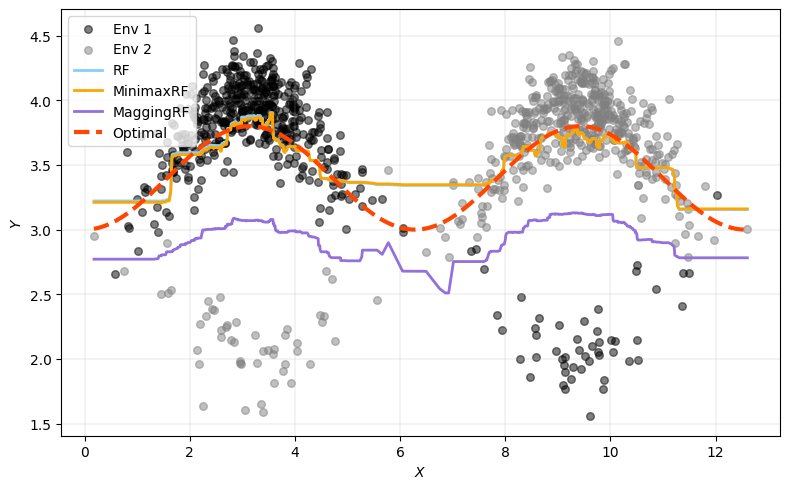

In [7]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, optfun=1)

## Setting 2

In [8]:
dtr = gen_data_v3(n=1000, setting=2)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 15
random_state = 42

dval = gen_data_v3(n=600, setting=2)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [9]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 17.520956695208756
Environment 1 MSE: 21.010414293824923
Environment 2 MSE: 8.892314022192522


np.float64(21.010414293824923)

In [10]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 18.745021610836208
Environment 1 MSE: 18.917368153219925
Environment 2 MSE: 10.778032682185236


np.float64(18.917368153219925)

### MinMax

In [12]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="base",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

2.4975737505642326 24.975737505642325
4.734350393243075 27.473311256206557
-------------------------------------------------------
999
Remaining:  0 [0. 0. 0.]
Best split:  391 0.40548868747618205
Impurity:  27.473311256206557 24.25584115662834
Best values:  [4.613956057130467, 4.89117945410851]
Best preds:  (array([4.61395606, 4.89117945]), array([391, 608]))
-------------------------------------------------------
608
Remaining:  391 [5183.50424324 3781.89007955 2306.90778114]
Best split:  439 2.564333633600978
Impurity:  24.25584115662834 22.810335978790484
Best values:  [2.7662082761531783, 6.880772981712814]
Best preds:  (array([2.76620828, 4.61395606, 6.88077298]), array([439, 391, 169]))
-------------------------------------------------------
169
Remaining:  830 [6720.28038184 5556.22066255 2914.09925682]
Best split:  162 4.3876383823317076
Impurity:  22.810335978790484 21.92789882856012
Best values:  [8.770788402528073, 2.250702659565642]
----------------------------------------

np.float64(19.33175377435881)

In [18]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 18.614972362467828
Environment 1 MSE: 18.95906952997084
Environment 2 MSE: 11.72470943919875


np.float64(18.95906952997084)

### Magging

In [11]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 44.28300374500994
Environment 1 MSE: 45.467104862687385
Environment 2 MSE: 17.669667671900342


np.float64(45.467104862687385)

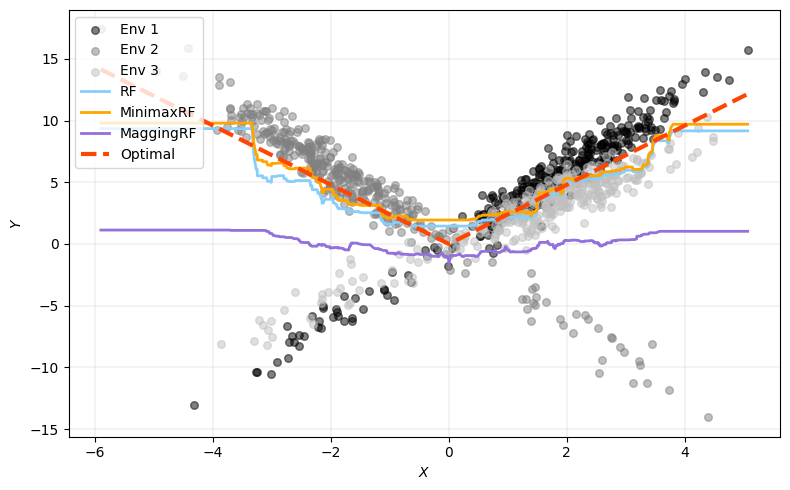

In [12]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, optfun=2)

## Setting 3

In [13]:
dtr = gen_data_v4(n_easy=500, n_hard=500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v4(n_easy=200, n_hard=200)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [14]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 24.254786033934113
Environment 1 MSE: 20.792654257767225


np.float64(24.254786033934113)

In [15]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 22.937530431807144
Environment 1 MSE: 22.109714685357584


np.float64(22.937530431807144)

### MinMax

In [25]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="base",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

7.128961559016602 71.28961559016602
4.0638896906665245 78.41857714918262
-------------------------------------------------------
1000
Remaining:  0 [0. 0.]
Best split:  517 0.8158328721523462
Impurity:  78.41857714918262 26.352014589978122
Best values:  [0.25544395217121835, 10.526457878745871]
Best preds:  (array([ 0.25544395, 10.52645788]), array([517, 483]))
-------------------------------------------------------
483
Remaining:  517 [ 9702.54514277 10436.75219597]
Best split:  189 2.5981295429908795
Impurity:  26.352014589978122 23.564771579788065
Best values:  [6.729899334923294, 11.177405076224318]
Best preds:  (array([ 0.25544395,  6.72989933, 11.17740508]), array([517, 189, 294]))
-------------------------------------------------------
294
Remaining:  706 [ 9998.73363701 10635.8243792 ]
Best split:  235 4.480766569684121
Impurity:  23.564771579788065 22.594163673075062
Best values:  [10.356425513395893, 14.799278717244684]
Best preds:  (array([ 0.25544395,  6.72989933, 10.356425

np.float64(23.341688120884655)

In [26]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 22.895182143970626
Environment 1 MSE: 22.173271454165807


np.float64(22.895182143970626)

### Magging

In [17]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 29.617105965556338
Environment 1 MSE: 17.83259138384467


np.float64(29.617105965556338)

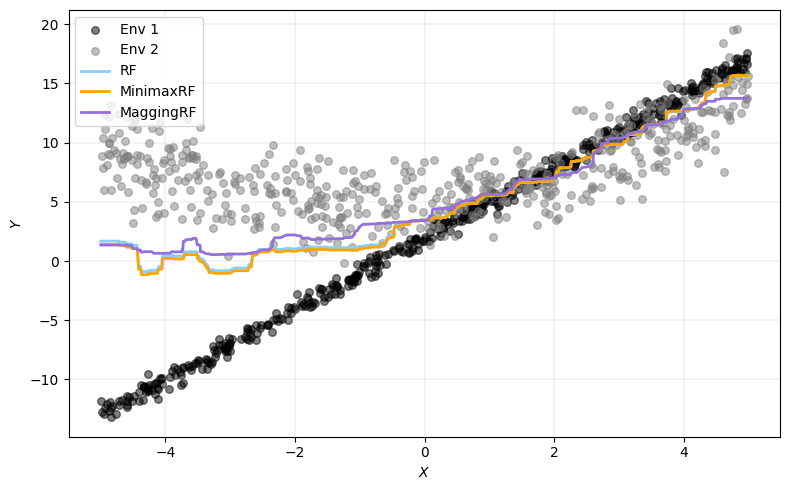

In [18]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr)

## Setting 4

In [19]:
dtr = gen_data_v5(n_samples=1000, adv_fraction=0.5, noise_var_env2=10.0)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v5(n_samples=400, adv_fraction=0.5, noise_var_env2=10.0)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [20]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 8.960230904632056
Environment 1 MSE: 99.11326202088827


np.float64(99.11326202088827)

In [ ]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

### MinMax

In [32]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="base",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

14.870442568913948 148.70442568913947
6.4382273174897415 163.5748682580534
-------------------------------------------------------
1000
Remaining:  0 [0. 0.]
Best split:  607 1.729431325710085
Impurity:  163.5748682580534 110.8626034932369
Best values:  [0.9118549353237521, 13.86565765611556]
Best preds:  (array([ 0.91185494, 13.86565766]), array([607, 393]))
-------------------------------------------------------
393
Remaining:  607 [ 6317.41063882 30143.50220755]
Best split:  275 3.9504529482332265
Impurity:  110.8626034932369 101.7474453066367
Best values:  [11.465452188687728, 19.904884316095327]
Best preds:  (array([ 0.91185494, 11.46545219, 19.90488432]), array([607, 275, 118]))
-------------------------------------------------------
118
Remaining:  882 [ 9518.27167978 48216.50108011]
Best split:  99 4.822961340329796
Impurity:  101.7474453066367 101.22783800497061
Best values:  [19.26486124850163, 23.233004267582555]
-------------------------------------------------------
275
Re

np.float64(89.75551254497833)

In [33]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 32.25482891351897
Environment 1 MSE: 89.7955754888564


np.float64(89.7955754888564)

### Magging

In [34]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 0.97231891104172
Environment 1 MSE: 128.72598596998915


np.float64(128.72598596998915)

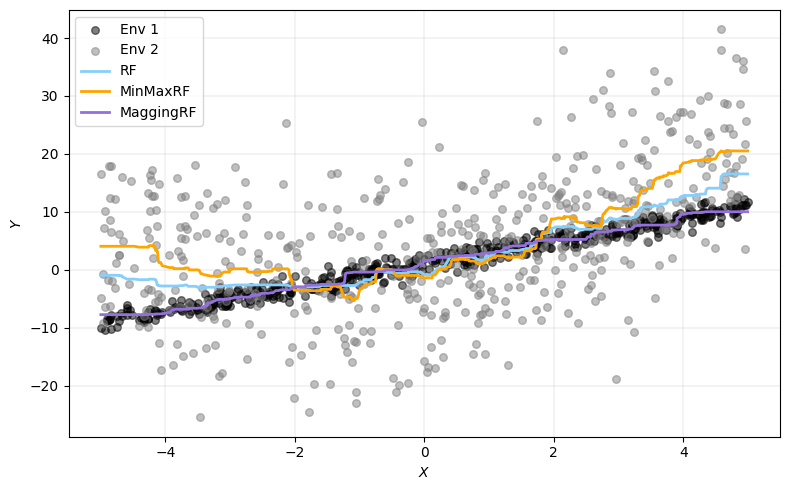

In [35]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_minmax
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr)

## Setting 5

In [23]:
dtr = gen_data_v6(n=1000, noise_std=0.5)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v6(n=600)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [24]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 13.181806223909755
Environment 1 MSE: 5.985511984704188
Environment 2 MSE: 1.5098758314189895


np.float64(13.181806223909755)

In [25]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 9.309802763463583
Environment 1 MSE: 9.143744040842693
Environment 2 MSE: 3.178406865435695


np.float64(9.309802763463583)

In [5]:
fitted_rf_2_refined, weights_rf_refined = rf.refine_weights(Xtr, Ytr, Etr, Xtr)
preds_rf_2_refined, _ = rf.refine_weights(Xtr, Ytr, Etr, Xtr_sorted)
max_mse(Ytr, fitted_rf_2_refined, Etr, verbose=True)

Environment 0 MSE: 9.214461955630522
Environment 1 MSE: 9.214467340723896
Environment 2 MSE: 3.2312333796466355


np.float64(9.214467340723896)

### MinMax

In [9]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="fullopt",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

2.7516698499076897 27.516698499076895
1.1167003850799984 30.268368348984584
-------------------------------------------------------
999
Best split:  473 0.42680805077822015
Impurity:  30.268368348984584 14.081861934457848
False Best values:  [-3.28220788  4.07350314]
-------------------------------------------------------
526
Best split:  290 2.6705294064471934
Impurity:  14.081861934457848 12.744934238574372
False Best values:  [-3.58874842  2.33321961  5.16838673]
-------------------------------------------------------
236
Best split:  229 3.9557764774836084
Impurity:  12.744934238574372 12.483637389610113
True Best values:  [-3.58874842  2.33321961  5.16838673]
-------------------------------------------------------
290
Best split:  101 1.1905951513682655
Impurity:  12.744934238574372 12.582648093095214
False Best values:  [-3.6292831   1.29038472  2.82850483  5.09295057]
-------------------------------------------------------
189
Best split:  161 2.5023179739017856
Impurity:  12.58

np.float64(9.237304983262112)

In [10]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 9.22284907572679
Environment 1 MSE: 9.23730026824506
Environment 2 MSE: 3.260260971405245


np.float64(9.23730026824506)

### Magging

In [26]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 13.799106342585175
Environment 1 MSE: 5.739841349744984
Environment 2 MSE: 1.467714303165803


np.float64(13.799106342585175)

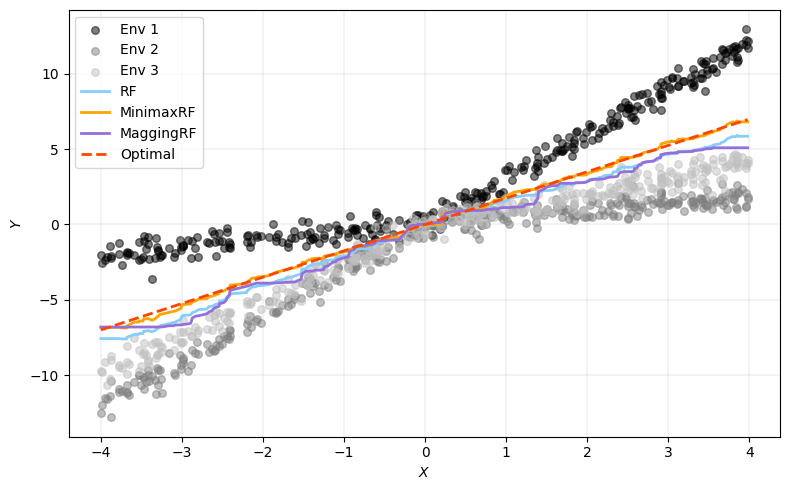

In [27]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2 # preds_minmax
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr, optfun=3)

## Setting 6

In [28]:
dtr = gen_data_v7(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v6(n=600)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [29]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 0.6491252306459793
Environment 1 MSE: 0.9944854316638767
Environment 2 MSE: 0.17889046608446182


np.float64(0.9944854316638767)

In [30]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 0.7794879916148291
Environment 1 MSE: 0.791872266753139
Environment 2 MSE: 0.3396310277810282


np.float64(0.791872266753139)

### MinMax

In [48]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="base",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

0.1299462725019986 1.299462725019986
0.11322090016434042 1.4294089975219846
-------------------------------------------------------
1500
Remaining:  0 [0. 0. 0.]
Best split:  1084 2.0259861137983264
Impurity:  1.4294089975219846 0.92534947672588
Best values:  [0.3660382636671469, -0.6598701173652239]
Best preds:  (array([-0.65987012,  0.36603826]), array([ 416, 1084]))
-------------------------------------------------------
416
Remaining:  1084 [214.8556447  376.38700715 193.33215158]
Best split:  192 2.914258145991436
Impurity:  0.92534947672588 0.8397595043234973
Best values:  [-0.19682711934763472, -0.7955912663828147]
Best preds:  (array([-0.79559127, -0.19682712,  0.36603826]), array([ 224,  192, 1084]))
-------------------------------------------------------
224
Remaining:  1276 [230.50660632 384.9316916  248.89576716]
Best split:  104 3.4633143862808837
Impurity:  0.8397595043234973 0.8347004657262102
Best values:  [-0.5516365218966893, -0.9426093228712134]
Best preds:  (array([

np.float64(0.8618012711184144)

In [49]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 0.7830545342089843
Environment 1 MSE: 0.7849779316280383
Environment 2 MSE: 0.37122639132500224


np.float64(0.7849779316280383)

### Magging

In [32]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 0.35382305364675576
Environment 1 MSE: 1.367959689621982
Environment 2 MSE: 0.31261778563809595


np.float64(1.367959689621982)

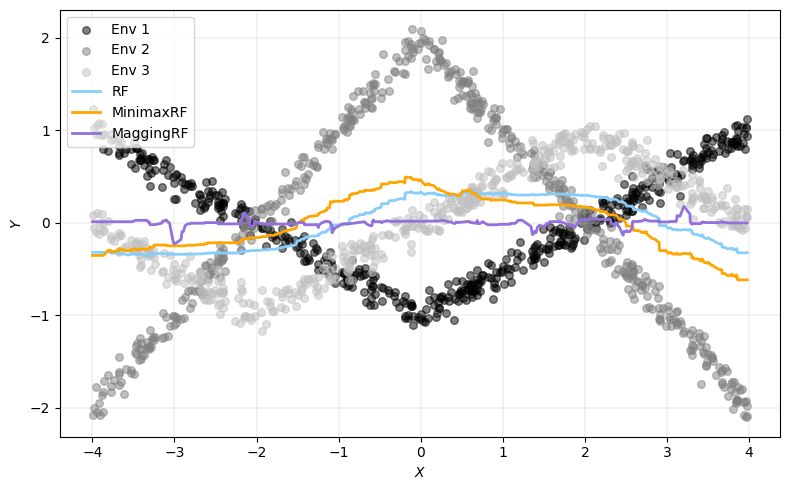

In [33]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr)

## Setting 7

In [34]:
dtr = gen_data_v8(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dval = gen_data_v6(n=600)
Xval = np.array(dval.drop(columns=['E', 'Y']))
Yval = np.array(dval['Y'])
Eval = np.array(dval['E'])

### Default

In [35]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 0.7260310108578305
Environment 1 MSE: 1.4101548676467963
Environment 2 MSE: 0.7388119293169839


np.float64(1.4101548676467963)

In [36]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 0.98937500847349
Environment 1 MSE: 1.0035557690262353
Environment 2 MSE: 0.9886655032006727


np.float64(1.0035557690262353)

### MinMax

In [56]:
rf_minmax = RandomForest("MinMaxRegression",
                         n_estimators=n_estimators,
                         min_samples_leaf=min_samples_leaf,
                         seed=random_state,
                         minmax_method="base",
                         )
rf_minmax.fit(Xtr, Ytr, Etr)
fitted_minmax = rf_minmax.predict(Xtr)
preds_minmax = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax, Etr, verbose=True)

0.20004235968847273 2.000423596884727
0.03665842100560753 2.2004659565731997
-------------------------------------------------------
1500
Remaining:  0 [0. 0. 0.]
Best split:  981 1.2698965827541526
Impurity:  2.2004659565731997 1.226832311876723
Best values:  [0.41739801333120014, -0.5944342743295276]
Best preds:  (array([-0.59443427,  0.41739801]), array([519, 981]))
-------------------------------------------------------
519
Remaining:  981 [268.93839021 404.33247515 268.58174596]
Best split:  267 2.19963988207719
Impurity:  1.226832311876723 1.1210601841490928
Best values:  [-0.21638923847598257, -0.9478973454667341]
Best preds:  (array([-0.94789735, -0.21638924,  0.41739801]), array([252, 267, 981]))
-------------------------------------------------------
252
Remaining:  1248 [391.85767562 491.36392634 278.2570878 ]
Best split:  126 2.7114363708332845
Impurity:  1.1210601841490928 1.118123039828672
Best values:  [-0.8312543353648426, -1.0783505516155314]
Best preds:  (array([-1.07

np.float64(1.087378653726818)

In [57]:
rf_minmax.modify_predictions_trees(Etr)
fitted_minmax_2 = rf_minmax.predict(Xtr)
preds_minmax_2 = rf_minmax.predict(Xtr_sorted)
max_mse(Ytr, fitted_minmax_2, Etr, verbose=True)

Environment 0 MSE: 1.006329695002778
Environment 1 MSE: 1.0140491395060764
Environment 2 MSE: 0.9956031754220456


np.float64(1.0140491395060764)

### Magging

In [37]:
rf_magging = MaggingRF_PB(n_estimators=n_estimators,
                          min_samples_leaf=min_samples_leaf,
                          random_state=random_state,
                          backend='adaXT',
                          )
fitted_magging, preds_magging = rf_magging.fit_predict_magging(Xtr, Ytr, Etr, Xtr_sorted)
wmag = rf_magging.get_weights()
max_mse(Ytr, fitted_magging, Etr, verbose=True)

Environment 0 MSE: 0.4950221988618638
Environment 1 MSE: 2.044599714415324
Environment 2 MSE: 0.5261850896916299


np.float64(2.044599714415324)

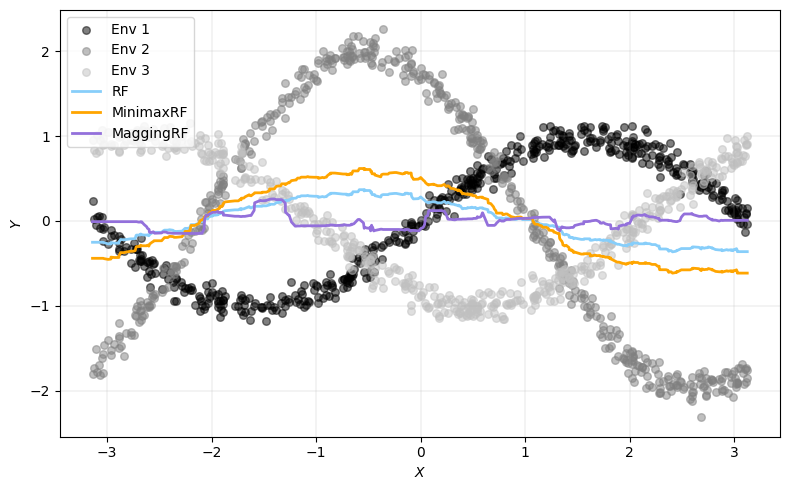

In [38]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_magging"] = preds_magging
# dtr["fitted_minmax_refined"] = preds_minmax_refined
# dtr["fitted_rf_refined"] = preds_rf_refined

plot_dtr(dtr)

## GDRO

In [7]:
from nldg.train_nn import *
from sklearn.preprocessing import StandardScaler

#dtr = gen_data_v2(n=1000)
dtr = gen_data_v3(n=1000, setting=2)
#dtr = gen_data_v4(n_easy=500, n_hard=500)
#dtr = gen_data_v5(n_samples=1000, adv_fraction=0.5, noise_var_env2=10.0)
#dtr = gen_data_v6(n=1000, noise_std=0.5)
#dtr = gen_data_v7(n=1500)
#dtr = gen_data_v8(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Ytr = Ytr - np.mean(Ytr)
dtr['Y'] = Ytr
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtr)
X_train_sorted = scaler.fit_transform(Xtr_sorted)

lr = 0.01 # 0.01 for second setting
seed = 42
hd = [64, 64]
wd = 0.001
epochs=1500

model, bweights = train_model_GDRO(X_train, Ytr, Etr,
                                   lr_model=lr, hidden_dims=hd,
                                   seed=seed, weight_decay=wd, epochs=epochs)
preds_gdro = predict_GDRO(model, X_train_sorted)
fitted_gdro = predict_GDRO(model, X_train)

In [9]:
bweights

tensor([6.9386e-01, 3.0613e-01, 5.1110e-06])

In [10]:
model_on, bweights_on = train_model_GDRO_online(X_train, Ytr, Etr,
                                                lr_model=lr, hidden_dims=hd,
                                                seed=seed, weight_decay=wd, epochs=epochs)
preds_gdro_on = predict_GDRO(model_on, X_train_sorted)
fitted_gdro_on = predict_GDRO(model_on, X_train)

In [11]:
model_default = train_model(X_train, Ytr,
                            lr=lr, hidden_dims=hd,
                            seed=seed, weight_decay=wd, epochs=epochs)
preds_default = predict_default(model_default, X_train_sorted)
fitted_default = predict_default(model_default, X_train)

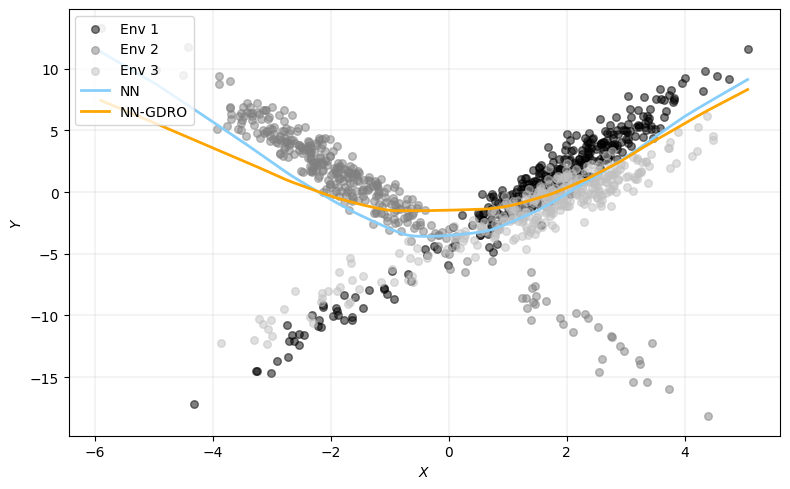

In [12]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_gdro"] = preds_gdro
dtr["fitted_gdro_online"] = preds_gdro_on
dtr["fitted_default"] = preds_default

plot_dtr(dtr, gdro=True)